https://drive.google.com/file/d/1yuPI5-2RH6J6j45W93l00tQxxDIow6HA/view?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

THE DATA

In [3]:
df1 = pd.read_csv('/content/gdrive/MyDrive/Data Science/GUVI/Assignment/Assignment-5/takehome_users.csv',encoding='latin1')
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
#it is better to convert the creation_time and last_session_creation_time variable to a date time object
df1.creation_time = pd.to_datetime(df1['creation_time'])
df1.last_session_creation_time = pd.to_datetime(df1['last_session_creation_time'])

In [6]:
# Also it is better to drop the name and email columns as it seems that it wont have much effect on the output
df1.drop(['name', 'email'], axis =1 ,inplace=True)
# can change the 'object_id' column to 'user_id'
df1['user_id'] = df1['object_id']
df1.drop('object_id',axis =1, inplace=True)
df1.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id
0,2014-04-22 03:53:30,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,1
1,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2
2,2013-03-19 23:14:52,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,3
3,2013-05-21 08:09:28,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,4
4,2013-01-17 10:14:20,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,5


Text(0.5, 1.0, 'How does creation category influence user onboarding')

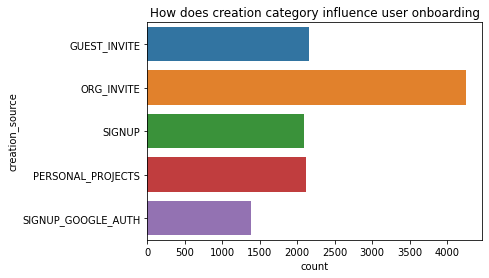

In [7]:
# I want to check how many users were onboarded from each of the categories of the feature 'creation_source'

sns.countplot(y ='creation_source', data = df1)
plt.title('How does creation category influence user onboarding')

From the above countplot we can see that ORG_INVITE is the major contributor for user count

In [8]:
# Want to see how many users actually opted in for mailing list and how many are enabled for marketing drip
email = np.sum(df1['opted_in_to_mailing_list'])
marketing = np.sum(df1['enabled_for_marketing_drip'])
print(f'Percentage of users opting for mailing list: {email/len(df1)*100}%')
print(f'Percentage of users for marketing drip: {round(marketing/len(df1)*100,2)}%')

Percentage of users opting for mailing list: 24.95%
Percentage of users for marketing drip: 14.93%


In [9]:
df1.groupby('invited_by_user_id')['user_id'].count().sort_values(ascending=False)

invited_by_user_id
10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
           ..
7792.0      1
3625.0      1
3627.0      1
7766.0      1
3.0         1
Name: user_id, Length: 2564, dtype: int64

User '10741' has invited the most number of users(13) 

Coming to the second CSV File

In [10]:
df2 = pd.read_csv('/content/gdrive/MyDrive/Data Science/GUVI/Assignment/Assignment-5/takehome_user_engagement.csv')
print(df2.shape)
df2.head()

(207917, 3)


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [11]:
# Function to get the week of a particular timestamp. It would be more useful to 
# get back a tuple of (year,week) so that this variable year_week can be unique
def week(i):
  x,y,_ = i.isocalendar()
  return (x,y)

In [88]:
#converting the 'time_stamp' variable type to datetime
df2['time_stamp'] = pd.to_datetime(df2['time_stamp'])
df2['year_week']=df2['time_stamp'].apply(week)
print(df2.shape)
df2.head()

(207917, 4)


,time_stamp,user_id,visited,year_week
0,2014-04-22 03:53:30,1,1,"(2014, 17)"
1,2013-11-15 03:45:04,2,1,"(2013, 46)"
2,2013-11-29 03:45:04,2,1,"(2013, 48)"
3,2013-12-09 03:45:04,2,1,"(2013, 50)"
4,2013-12-25 03:45:04,2,1,"(2013, 52)"


Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one seven­day period , identify which factors predict future user
adoption .

In [75]:
df_temp = df2.groupby(['year_week','user_id'])['visited'].sum()
df_temp

year_week   user_id
(2012, 22)  563        1
            1693       1
            1995       1
            2120       1
            2136       1
                      ..
(2014, 23)  11869      1
            11885      1
            11895      3
            11906      1
            11924      3
Name: visited, Length: 68807, dtype: int64

In [102]:
index = df_temp.index
index1 = index.get_level_values(0)
index1 = list(set(index1))
index2 = index.get_level_values(1)
print(len(index1),index2.size)

106 68807


In [111]:
adopted_user = []
j = 0
for i in index1:
  for k in df_temp.loc[i]:
    if k>3:
      if index2[j] not in adopted_user:
        adopted_user.append(index2[j])
    j = j + 1    

In [114]:
adopted = pd.DataFrame(adopted_user,columns = ['user_id'])
#create a new column 'adopted_user' to see if a particular user is adopted_user or not
df2['adopted_user']=df2['user_id'].apply(lambda x:1 if x in adopted_user else 0)

In [ ]:
adopted = df2[['user_id','adopted_user']]
#Merge the adopted user info to users dataframe
adopted_df = pd.merge(df1, adopted, on='user_id', how='outer')
#Creating separate columns from 'creation_time'
adopted_df['creation_year'] = adopted_df['creation_time'].dt.year
adopted_df['creation_month'] = adopted_df['creation_time'].dt.month
adopted_df['creation_day'] = adopted_df['creation_time'].dt.day
#Creating separate columns from 'last_session_creation_time'
adopted_df['last_session_year'] = adopted_df['last_session_creation_time'].dt.year
adopted_df['last_session_month'] = adopted_df['last_session_creation_time'].dt.month
adopted_df['last_session_day'] = adopted_df['last_session_creation_time'].dt.day
#dropping the unnecessary columns
adopted_df.drop(['creation_time', 'last_session_creation_time', 'user_id'], axis=1, inplace=True)

In [119]:
# Converting 'invited_by_user_id' into 'invited' having only binary values
adopted_df['invited'] = np.where(adopted_df['invited_by_user_id'].isnull(), 1, 0)
adopted_df.drop('invited_by_user_id', axis=1, inplace=True)
creation_source = pd.get_dummies(adopted_df['creation_source'],drop_first=True)
adopted_df=pd.concat([adopted_df,creation_source], axis=1)
adopted_df.drop('creation_source', axis=1, inplace=True)
#Fill in the missings
adopted_df=adopted_df.fillna(0)

In [124]:
adopted_df

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,creation_year,creation_month,creation_day,last_session_year,last_session_month,last_session_day,invited,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,0,11,0.0,2014,4,22,1970.0,1.0,1.0,0,0,0,0,0
1,0,0,1,1.0,2013,11,15,1970.0,1.0,1.0,0,1,0,0,0
2,0,0,1,1.0,2013,11,15,1970.0,1.0,1.0,0,1,0,0,0
3,0,0,1,1.0,2013,11,15,1970.0,1.0,1.0,0,1,0,0,0
4,0,0,1,1.0,2013,11,15,1970.0,1.0,1.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211089,0,0,89,0.0,2013,9,6,1970.0,1.0,1.0,0,1,0,0,0
211090,0,0,200,0.0,2013,1,10,1970.0,1.0,1.0,1,0,0,0,1
211091,1,1,83,0.0,2014,4,27,1970.0,1.0,1.0,0,0,0,0,0
211092,0,0,6,1.0,2012,5,31,1970.0,1.0,1.0,1,0,1,0,0


We will be using Mutual_info classifier method to find out the most important features that is related to predicting adopted_user

In [125]:
# Mutual Information
X = adopted_df.drop('adopted_user',axis=1)
y = adopted_df['adopted_user']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state=3)
print('Train size:',(len(X_train)/len(X))*100)
print('Train observations:',(len(X_train)))
print('Test size:',(len(X_test)/len(X))*100)
print('Test observations:',(len(X_test)))


Train size: 89.99971576643581
Train observations: 189984
Test size: 10.000284233564194
Test observations: 21110


In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)

In [127]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

last_session_day              0.094831
last_session_month            0.094625
last_session_year             0.081238
creation_year                 0.032636
org_id                        0.017016
creation_month                0.009890
invited                       0.008187
ORG_INVITE                    0.004461
PERSONAL_PROJECTS             0.002823
opted_in_to_mailing_list      0.002646
creation_day                  0.002643
SIGNUP                        0.001690
SIGNUP_GOOGLE_AUTH            0.001279
enabled_for_marketing_drip    0.000778
dtype: float64

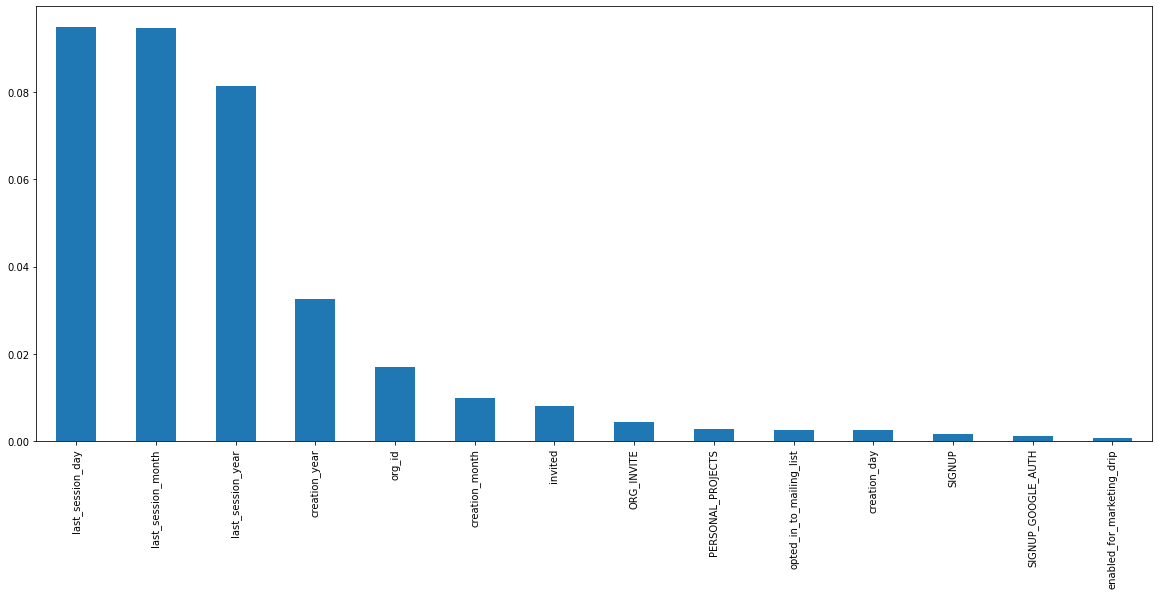

In [128]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

So from the above bar chart we observe that the last session columns are the most important in predicting future user adoption